<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas et des autres
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importation de la librairie plotly express
import plotly.express as px      
import plotly.graph_objects as go
import openpyxl

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

#Importation du fichier web.xlsx
df_web = pd.read_excel("C:/Users/AUCLAIR/Documents/Projet_Data_6/web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("C:/Users/AUCLAIR/Documents/Projet_Data_6/erp.xlsx")
#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel("C:/Users/AUCLAIR/Documents/Projet_Data_6/liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
print("Le DataFrame comporte", df_erp.shape[1], "colonnes")

Le DataFrame comporte 6 colonnes


In [7]:
#La nature des données dans chacune des colonnes
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

In [8]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64

In [9]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64

In [10]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [11]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
doublons_erp = df_erp.duplicated(subset='product_id')
df_erp[doublons_erp]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [12]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()

array(['instock', 'outofstock'], dtype=object)

In [13]:
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp[(df_erp['stock_status']=='outofstock') & (df_erp['stock_quantity']!=0)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
4,4039,1,46.0,3,outofstock,23.77
449,4973,0,10.0,-10,outofstock,4.96
573,5700,1,44.5,-1,outofstock,22.30


**Je constate que les colonnes stock_quantity et stock_status, sont logiquement liées, les 3 exceptions notées au dessus correspondent certaines à des erreurs.**

In [14]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
stock =df_erp["stock_quantity"]
df_erp["stock_status_2"] = np.where(stock==0, 'outofstock', 'instock')
df_erp[["stock_quantity", "stock_status_2"]]

,stock_quantity,stock_status_2
0,16,instock
1,10,instock
2,0,outofstock
3,26,instock
4,3,instock
...,...,...
820,30,instock
821,9,instock
822,6,instock
823,14,instock


In [15]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [16]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset
liste = np.where(df_erp["stock_status"] == df_erp["stock_status_2"], 1, 0)
print("Nombre de lignes identiques :", liste.sum(), "sur 825")

Nombre de lignes identiques : 821 sur 825


In [17]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous donne ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [18]:
#Identification des lignes différentes
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [19]:
#Corriger la ou les données incohérentes
df_erp.loc[df_erp['stock_quantity'] <  0, "stock_quantity"] = 0
#Vérification en utilisant le même code que plus haut pour afficher les problèmes
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,0,outofstock,4.96,instock
573,5700,1,44.5,0,outofstock,22.30,instock


**Je fais le choix de remplacer les 2 valeurs négatives par 0**

In [20]:
# Je recréé la colonne "stock_status_2" pour s'adapter au nouveau changement
df_erp["stock_status_2"] = np.where(df_erp['stock_quantity']==0, 'outofstock', 'instock')
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


**Je décide de remplacer les valeurs négatives par 0, mon choix étant appuyé par la valeur 'outofstock' dans la colonne "stock_status". Je relance pour finir la colonne "stock_status_2" pour qu'elle s'adapte à ce changement.  
Il n'ya pas de doublons pour la clé "product_id", et pas de valeurs manquantes dans le DataFrame.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [21]:
###############
## LES PRIX  ##
###############
#Vérification des prix: Y a t-il des prix non renseignés?
valeurs_manquantes_prix = df_erp['price'].isna().sum()
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'articles avec un prix non renseigné: {}".format(valeurs_manquantes_prix))

Nombres d'articles avec un prix non renseigné: 0


In [22]:
#Vérification des prix: Y a t-il des prix  négatifs ou nuls?
df_erp_err_val = df_erp[df_erp['price'] <= 0]
df_erp_err_val

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [23]:
#Afficher le prix minimum de la colonne "price"
print("prix minimum de la colonne 'price': {}".format(df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"
print("prix minimum de la colonne 'price': {}".format(df_erp['price'].max()))

prix minimum de la colonne 'price': -20.0
prix minimum de la colonne 'price': 225.0


In [24]:
#Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
print("Différents prix inférieurs à 0 :")
for p in df_erp_err_val['price']:
    print(f" {p}")

Différents prix inférieurs à 0 :
 -20.0
 -8.0
 -9.1


In [25]:
#Transformation des valeurs négatives en positives
df_erp.loc[df_erp['price']<0, "price"] = df_erp.loc[df_erp['price']<0, "price"].abs()
df_erp.loc[[151, 469, 739]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,20.0,0,outofstock,10.33,outofstock
469,5017,0,8.0,0,outofstock,4.34,outofstock
739,6594,0,9.1,19,instock,4.61,instock


**Je fais le choix de transformer les valeurs négatives en valeurs positives pour les prix.  
Il n'y a pas de valeurs manquantes pour cette variable.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [26]:
#######################
### stock_quantity  ###
#######################

#Afficher la quantité minimum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].min())

0


In [27]:
#Afficher la quantité maximum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].max())

145


In [28]:
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
df_erp[df_erp['stock_quantity']<0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


**Je note que aucune ligne (donc un produit précis) ne correspond à une valeur négative, ce qui est rassurant.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [29]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
df_erp['onsale_web'].value_counts()

onsale_web
1    716
0    109
Name: count, dtype: int64

In [30]:
onsale_stock_commun = df_erp[(df_erp['onsale_web'] == 0) & (df_erp['stock_quantity'] == 0)]
len(onsale_stock_commun)

44

**Je fais la supposition que "on_sale" correspond au fait que le produit est achetable depuis le site**

In [31]:
#Quelles sont les colonnes à conserver selon vous?
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp["stock_status"] = df_erp["stock_status_2"]
df_erp.drop("stock_status_2", axis=1, inplace = True)
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


**Je remplace le contenu de "stock_status" par "stock_status_2", car cette dernière correspond mieux à "stock_quantity" suite au traitement fait auparavant.  
Enfin, je supprime "stock_status_2" pour ne pas faire de redondance.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [32]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombre de valeurs manquantes dans la colonne 'purchase_price' :", df_erp['purchase_price'].isna().sum())

Nombre de valeurs manquantes dans la colonne 'purchase_price' : 0


In [33]:
#Afficher le prix minimum de la colonne "purchase_price"
print("Valeur minimale de 'purchase_price' :",df_erp['purchase_price'].min())

Valeur minimale de 'purchase_price' : 2.74


In [34]:
#Afficher le prix maximum de la colonne "purchase_price"
print("Valeur maximale de 'purchase_price' :",df_erp['purchase_price'].max())

Valeur maximale de 'purchase_price' : 137.81


**La variable 'prix d'achat' n'a pas de valeurs manquantes.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [35]:
#Dimension du dataset
df_web.shape

(1513, 29)

In [36]:
#Nombre d'observations
print(f"Nombre d'observations (lignes) : {df_web.shape[0]}")

Nombre d'observations (lignes) : 1513


In [37]:
#Nombre de caractéristiques
print(f"Nombre de caractéristiques (colonnes) : {df_web.shape[1]}")

Nombre de caractéristiques (colonnes) : 29


In [38]:
#La nature des données dans chacune des colonnes
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


In [39]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.count()

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [40]:
#Le nombre de valeurs manquantes dans chacune des colonnes
df_web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
product_type               84
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [41]:
#Selon vous, quelles sont les colonnes à conserver ?
compte_valeurs = df_web.nunique(dropna = True)
valeurs_uniques = compte_valeurs[compte_valeurs == 1]
valeurs_uniques

virtual           1
downloadable      1
rating_count      1
average_rating    1
tax_status        1
post_status       1
comment_status    1
ping_status       1
post_parent       1
menu_order        1
post_mime_type    1
comment_count     1
dtype: int64

In [42]:
colonnes_vides = df_web.columns[df_web.isna().all()]
print(colonnes_vides)

Index(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], dtype='object')


**Je décide de supprimer les colonnes totalement vides, ou ne contenant qu'une valeur unique (car inexploitable).**

In [43]:
#Je supprime les 16 colonnes concernées
cols_to_drop = (
    list(df_web.columns[1:5]) +
    list(df_web.columns[6:8]) +
    [df_web.columns[11]] +
    list(df_web.columns[15:19]) +
    list(df_web.columns[22:24]) +
    [df_web.columns[25]] +
    list(df_web.columns[27:29])
)
df_web = df_web.drop(cols_to_drop, axis=1)
df_web.columns

Index(['sku', 'total_sales', 'post_author', 'post_date', 'post_date_gmt',
       'product_type', 'post_title', 'post_excerpt', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type'],
      dtype='object')

In [44]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
liste_sku = df_web['sku'].unique()
liste_sku

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [45]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
df_web_sans_NAN = df_web[~df_web['sku'].isna()].copy()
df_web_sans_NAN['sku']= df_web_sans_NAN['sku'].astype(str)
valeurs_numeriques = df_web_sans_NAN['sku'].str.fullmatch(r'\d+')
df_web_sans_NAN.loc[~valeurs_numeriques, "sku"]

272                 13127-1
842     bon-cadeau-25-euros
1117                13127-1
1387    bon-cadeau-25-euros
Name: sku, dtype: object

In [46]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre
#Suppression des valeurs
df_web.drop([272, 842, 1117, 1387], inplace =True)

In [47]:
#Identifier les lignes sans code article
df_web[df_web['sku'].isna()]

,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
8,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
20,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
30,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
41,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1429,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1432,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1445,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [48]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_no_sku =  df_web[df_web['sku'].isna()]
df_web_no_sku

,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
8,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
20,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
30,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
41,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1429,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1432,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1445,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [49]:
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
df_web_no_sku.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   post_author        2 non-null      float64       
 3   post_date          2 non-null      datetime64[ns]
 4   post_date_gmt      2 non-null      datetime64[ns]
 5   product_type       2 non-null      object        
 6   post_title         2 non-null      object        
 7   post_excerpt       2 non-null      object        
 8   post_name          2 non-null      object        
 9   post_modified      2 non-null      datetime64[ns]
 10  post_modified_gmt  2 non-null      datetime64[ns]
 11  guid               2 non-null      object        
 12  post_type          2 non-null      object        
dtypes: datetime64[ns](4), float64(2), object(7)
memory usage: 9.3+ KB


**Je constate que le nouveau dataFrame créé avec les lignes vides pour "sku" donne un Dataframe vide, ainsi, on conclu qu'il faut nécessairement une clé "sku" pour avoir une ligne de données dans "df_web".**

In [50]:
#Suppression des NAN 
df_web.dropna(subset="sku", inplace =True)
len(df_web)

1424

In [51]:
#Vérification
df_web['sku'].isna().sum()

np.int64(0)

**Je supprime ainsi toutes les lignes avec des valeurs manquantes pour la clé "sku".**

In [52]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
doublons_df_web = df_web.duplicated(subset='sku')
df_web[doublons_df_web ]

,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
56,12869,7.0,2.0,2019-03-28 14:29:35,2019-03-28 13:29:35,Vin,Stéphane Tissot Arbois D.D. 2016,NaN,stephane-tissot-arbois-dd-2016,2019-12-13 15:40:01,2019-12-13 14:40:01,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
74,13809,8.0,2.0,2018-05-15 11:11:59,2018-05-15 09:11:59,Vin,Antoine-Marie Arena Vin de France Rouge San Gi...,Ce vin montre de la précision et de la justess...,antoine-marie-arena-vin-de-france-rouge-san-gi...,2020-04-23 22:54:55,2020-04-23 20:54:55,https://www.bottle-neck.fr/?post_type=product&...,product
109,15758,18.0,2.0,2018-02-16 10:54:27,2018-02-16 09:54:27,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,"Un Touraine Amboise fin et élégant, un joli ch...",frissant-chenin-pierres-2018,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
117,13766,2.0,2.0,2018-03-22 10:35:08,2018-03-22 09:35:08,Whisky,Wemyss Malts Blended Malt Scotch Whisky Treacl...,NaN,whisky-wemyss-treacle-chest,2020-07-20 09:30:05,2020-07-20 07:30:05,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
137,16580,8.0,2.0,2019-07-24 09:31:48,2019-07-24 07:31:48,Vin,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,2020-08-27 08:12:58,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16326,5.0,2.0,2019-04-18 11:32:46,2019-04-18 09:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,"Sur le millésime 2017, Au Capceu du domaine Ca...",camin-larredya-jurancon-moelleux-capceu-2018,2020-08-27 09:24:46,2020-08-27 07:24:46,https://www.bottle-neck.fr/?post_type=product&...,product
1509,15662,15.0,2.0,2018-02-27 10:13:03,2018-02-27 09:13:03,Vin,Chermette Domaine du Vissoux Beaujolais Griott...,"C'est le Beaujolais typique : fruité, frais, g...",chermette-domaine-du-vissoux-beaujolais-griott...,2020-07-11 11:25:03,2020-07-11 09:25:03,https://www.bottle-neck.fr/?post_type=product&...,product
1510,15329,3.0,2.0,2019-03-27 18:28:15,2019-03-27 17:28:15,Vin,Agnès Levet Côte Rôtie Péroline 2017,NaN,agnes-levet-cote-rotie-peroline-2017,2020-07-28 09:45:02,2020-07-28 07:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,14827,7.0,2.0,2018-11-26 09:56:52,2018-11-26 08:56:52,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2020-07-28 09:45:02,2020-07-28 07:45:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [53]:
#Analyse poussée des doublons
df_web['sku'] = df_web['sku'].astype(str)
d= df_web.duplicated(subset='sku', keep=False)
df_duplicates = df_web[d].sort_values('sku').head(10)
df_duplicates

,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
1030,10014,10.0,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
668,10014,10.0,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product
748,10459,4.0,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&...,product
887,10459,4.0,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
802,10775,6.0,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,Belle bouteille dotée d’une grande complexité ...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/?post_type=product&...,product
1317,10775,6.0,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,NaN,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
520,10814,7.0,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,NaN,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
860,10814,7.0,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,"La robe est rouge vif. Le nez est très floral,...",thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
1322,11049,4.0,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,NaN,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
408,11049,4.0,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,Superbe robe carmin profond. Un très grand ter...,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,https://www.bottle-neck.fr/?post_type=product&...,product


**Je remarque sur les doublons 'sku' que les lignes sont 2 à 2 quasiment identiques, si ce n'est pour quelques colonnes, dont "post_type". Je décide de garder uniquement les lignes "post_type" ayant pour valeur 'product'**

In [54]:
# Nettoyer post_type au cas où
df_web['post_type'] = df_web['post_type'].astype(str).str.strip().str.lower()

# Identifier les SKU dupliqués
dupli_skus = df_web[df_web.duplicated(subset='sku', keep=False)]['sku']

# Garder toutes les lignes où
# - soit le SKU n'est pas dupliqué
# - soit le SKU est dupliqué ET post_type == 'product'
df_web_filtered = df_web[(~df_web['sku'].isin(dupli_skus)) | 
                     ((df_web['sku'].isin(dupli_skus)) & (df_web['post_type'] == 'product'))]

In [55]:
#Vérification de la suppression des doublons
doublons_df_web_filtered =df_web_filtered.duplicated(subset='sku')
df_web_filtered[doublons_df_web_filtered ]

,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type


In [56]:
# Trouver les sku qui ont plus d'une valeur unique de total_sales
skus_avec_incoherence = df_web.groupby('sku')['total_sales'].nunique()
skus_incoherents = skus_avec_incoherence[skus_avec_incoherence > 1].index

# Afficher les lignes concernées
df_incoherents = df_web[df_web['sku'].isin(skus_incoherents)]

print(df_incoherents)


        sku  total_sales  post_author           post_date       post_date_gmt  \
114   14561        111.0          2.0 2018-09-01 15:34:55 2018-09-01 13:34:55   
219   15346         22.0          2.0 2018-07-31 11:49:05 2018-07-31 09:49:05   
452   14950        122.0          2.0 2018-04-18 11:53:51 2018-04-18 09:53:51   
523    1366        116.0          2.0 2018-02-13 13:45:31 2018-02-13 12:45:31   
548    1366          6.0          2.0 2018-02-13 13:45:31 2018-02-13 12:45:31   
843   15346          2.0          2.0 2018-07-31 11:49:05 2018-07-31 09:49:05   
999   14950         22.0          2.0 2018-04-18 11:53:51 2018-04-18 09:53:51   
1052  14561         11.0          2.0 2018-09-01 15:34:55 2018-09-01 13:34:55   

     product_type                                    post_title  \
114           Vin       Argentine Mendoza Alamos Torrontes 2017   
219           Vin           Albert Mann Pinot Noir Grand H 2017   
452           Vin      François Baur Pinot Noir Schlittweg 2017   
52

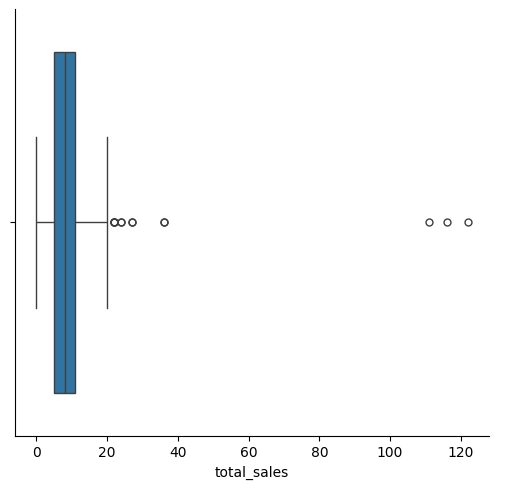

In [57]:
#Vérification des valeurs extrêmes de "total_sales"
sns.catplot(data=df_web, x='total_sales', kind='box')
plt.show()

In [58]:
#Longeur du dataframe nettoyé
len(df_web_filtered)

712

In [59]:
df_web_filtered.isna().sum()

sku                  0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
product_type         0
post_title           0
post_excerpt         0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64

**En conclusion, df_web_filtered est la nouvelle version de df_web, avec aucun NAN. Le Dataframe a maintenant 712 lignes, et sans doublons pour la clé "sku".  
Pour les paires doublons présents sur la clé "sku", j'ai fais le choix de garder ceux ayant la mentions "product" sur "post_type", car plus cohérents et complets.**


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [60]:
df_liaison

,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039
...,...,...
820,NaN,7203
821,NaN,7204
822,13127-1,7247
823,14680-1,7329


In [61]:
#Dimension du dataset
#Nombre d'observations
df_liaison.shape

(825, 2)

In [62]:
#Nombre de caractéristiques
print(f"Nombre d'observations (lignes) : {df_liaison.shape[0]}")

Nombre d'observations (lignes) : 825


In [63]:
#Consulter le nombre de colonnes
print(f"Nombre d'observations (lignes) : {df_liaison.shape[1]}")

Nombre d'observations (lignes) : 2


In [64]:
#La nature des données dans chacune des colonnes
df_liaison.dtypes

id_web        object
product_id     int64
dtype: object

In [65]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.count()

id_web        734
product_id    825
dtype: int64

In [66]:
#Le nombre de valeurs manquantes dans chacune des colonnes
df_liaison.isna().sum()

id_web        91
product_id     0
dtype: int64

**Je supprime les valeurs manquantes de la clé "id_web"**

In [67]:
df_liaison.dropna(inplace = True)
df_liaison.isna().sum()

id_web        0
product_id    0
dtype: int64

In [68]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
doublons_product_liaison = df_liaison.duplicated("product_id")
df_liaison[doublons_product_liaison]

,id_web,product_id


**Il y a aucun doublons pour la colonne "product_id".**

In [69]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
doublons_liaison_web = df_liaison.duplicated("id_web", keep=False)
df_liaison[doublons_liaison_web]

,id_web,product_id


**Il y a aucun doublons pour la colonne "id_web".**

In [70]:
#Avons-nous des articles sans correspondance?
#Je compare d'abord le nombre de clés unique
df_liaison['id_web'].nunique(), df_liaison['product_id'].nunique()

(734, 734)

In [71]:
df_liaison['id_web']

0        15298
1        15296
2        15300
3        19814
4        19815
        ...   
792      15891
793      15887
822    13127-1
823    14680-1
824      16230
Name: id_web, Length: 734, dtype: object

In [72]:
#Recherche des valeurs erronées
df_liaison_sans_NAN = df_liaison[~df_liaison['id_web'].isna()].copy()
df_liaison_sans_NAN['id_web'] =df_liaison_sans_NAN['id_web'].astype(str)
valeurs_numerique_liaison = df_liaison_sans_NAN['id_web'].str.fullmatch(r'\d+')
df_liaison_sans_NAN.loc[~valeurs_numerique_liaison, 'id_web']

443    bon-cadeau-25-euros
822                13127-1
823                14680-1
Name: id_web, dtype: object

In [73]:
#correction des valeurs
df_liaison.drop(443, inplace = True)
df_liaison.loc[822, 'id_web'] = 13127
df_liaison.loc[823, 'id_web'] = 14680

In [74]:
#Je vérifie une deuxième fois les doublons de la colonne "id_web" après mes modifications
doublons_liaison_web = df_liaison.duplicated("id_web", keep=False)
df_liaison[doublons_liaison_web]

,id_web,product_id
17,13127,4053
363,14680,4757
822,13127,7247
823,14680,7329


In [75]:
len(df_liaison)

733

In [76]:
#Je supprimes les mauvaises clés
df_liaison.drop([822, 823], inplace=True)
doublons_liaison_web = df_liaison.duplicated("id_web", keep=False)
df_liaison[doublons_liaison_web]

,id_web,product_id


**J'ai supprimé 3 lignes correspondant à des mauvaises clés "sku."**

In [77]:
len(df_liaison)

731

In [78]:
#Puis je donne la différence
nb_sans_correspondance = df_liaison['id_web'].isna().sum()
print(f"Il y a {nb_sans_correspondance} articles sans correspondance.")

Il y a 0 articles sans correspondance.


**J'ai supprimé 91 lignes correspondant à des valeurs manquantes pour la clé "id_web".  
Ensuite, j'ai trouvé 3 erreurs 'hors format', que j'ai supprimé également.  
On se retrouve donc avec un dataframe sans aucun doublons, et sans valeurs manquantes, de 731 lignes.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [79]:
#Fusion des fichiers df_erp et df_liaison
df_merge= df_liaison.merge(df_erp, on='product_id', how='left')
df_merge

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,15298,3847,1,24.2,16,instock,12.88
1,15296,3849,1,34.3,10,instock,17.54
2,15300,3850,1,20.8,0,outofstock,10.64
3,19814,4032,1,14.1,26,instock,6.92
4,19815,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...,...
726,15741,6928,1,19.0,15,instock,9.62
727,16135,6930,1,8.4,28,instock,4.34
728,15891,7023,1,27.5,23,instock,14.21
729,15887,7025,1,69.0,8,instock,34.22


In [80]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
df_merge_verification = df_liaison.merge(df_erp, on='product_id', how='left', indicator = True)
df_merge_verification['_merge'].value_counts()

_merge
both          731
left_only       0
right_only      0
Name: count, dtype: int64

In [81]:
#Vérifications des valeurs manquantes
df_merge.isna().sum()

id_web            0
product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64

In [82]:
#Vérification des doublons
doublons_df_merge = df_merge.duplicated(keep=False)
df_merge[doublons_df_merge]

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


**Toutes les lignes matchent bien.  
Le dataframe df_merge est sans doublons et sans valeurs manquantes.  
df_merge fait 731 lignes.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [83]:
#Fusionner les datasets df_merge et df_web
df_web_filtered.loc[:, 'sku'] = df_web_filtered['sku'].astype(int)
df_merge.loc[:, 'id_web'] = df_merge['id_web'].astype(int)
df_merge2 = df_merge.merge(df_web_filtered, how='left', left_on='id_web', right_on='sku')
df_merge2.head()

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,15298,3847,1,24.2,16,instock,12.88,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,15296,3849,1,34.3,10,instock,17.54,15296,9.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,15300,3850,1,20.8,0,outofstock,10.64,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,19814,4032,1,14.1,26,instock,6.92,19814,12.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,19815,4039,1,46.0,3,instock,23.77,19815,3.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [84]:
df_merge2.dtypes

id_web                       object
product_id                    int64
onsale_web                    int64
price                       float64
stock_quantity                int64
stock_status                 object
purchase_price              float64
sku                          object
total_sales                 float64
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
product_type                 object
post_title                   object
post_excerpt                 object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
dtype: object

In [85]:
#Avons-nous des lignes sans correspondance?
df_merge2_verification = df_merge.merge(df_web_filtered, how='left', left_on='id_web', right_on='sku', indicator=True)
df_merge2_verification['_merge'].value_counts()

_merge
both          712
left_only      19
right_only      0
Name: count, dtype: int64

In [86]:
df_merge2_verification[df_merge2_verification['_merge'] == 'left_only']

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,_merge
185,13771,4289,0,22.8,0,outofstock,11.90,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
227,15065,4568,0,21.5,0,outofstock,11.22,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
230,14785,4584,0,32.3,0,outofstock,17.36,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
334,12601,4741,0,12.4,0,outofstock,6.66,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
368,15154,4864,0,8.3,0,outofstock,9.99,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
371,14360,4869,0,17.2,0,outofstock,9.33,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
399,15608,4921,0,13.8,0,outofstock,7.13,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
400,15586,4922,0,21.5,0,outofstock,10.55,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
442,15272,5018,0,15.4,0,outofstock,7.72,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
444,15630,5021,0,17.1,0,outofstock,8.92,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only


In [87]:
#Comme toutes les données invalides ont un clé "sku", je supprime les 'sku' NAN
donnees_valides = ~df_merge2['sku'].isna()
df_data = df_merge2[donnees_valides].copy()
df_data.isna().sum()

id_web               0
product_id           0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
purchase_price       0
sku                  0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
product_type         0
post_title           0
post_excerpt         0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64

In [88]:
doublons_df_data1 = df_data.duplicated(subset='id_web')
df_data[doublons_df_data1]

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type


In [89]:
doublons_df_data2 = df_data.duplicated(subset='sku')
df_data[doublons_df_data2]

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type


**Je créé le dataframe df_data.  
Il y avait 19 lignes sur 731 qui ne matchaient pas, je les ai supprimées.
df_data fait donc 712 lignes, sans doublons pour les clés 'sku' et 'id_web' ni valeurs manquantes.** 

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

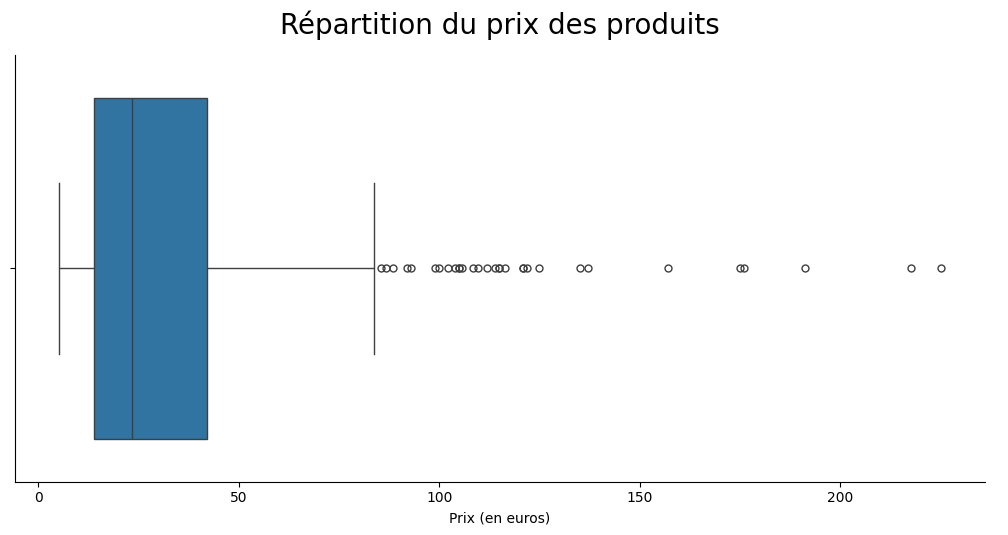

In [90]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
g = sns.catplot(data=df_data, x='price', kind='box', aspect=2)
g.fig.suptitle("Répartition du prix des produits", y=1.06, fontsize=20)
g.set(xlabel ="Prix (en euros)")
plt.show()

In [91]:
#Autre méthode avec plotly express
# Création de la boîte à moustaches interactive avec Plotly
fig = px.box(df_data, y="price", title="Répartition du prix des produits")

# Mise à jour du label de l’axe Y
fig.update_layout(
    yaxis_title="Prix (en euros)",
    title_x=0.5  # Centrer le titre
)

fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [92]:
#Calculer la moyenne du prix
moyenne = df_data['price'].mean()
moyenne

np.float64(32.3124297752809)

In [93]:
#Calculer l'écart-type du prix
std = df_data['price'].std()
std

np.float64(27.62089402816087)

In [94]:
#Calculer le Z-score

In [95]:
#Quel est le seuil prix dont le z-score est supérieur à 3?
# z_score = (valeur - moyenne) / std
# 3 =(valeur - moyenne) / std
# DONC 3*std + moyenne = valeur
valeur = round(3*std + moyenne, 2)
print ("Valeur seuil d'après le z_score :", valeur, "euros")

Valeur seuil d'après le z_score : 115.18 euros


**Si l'on dépasse un z_score de 3, alors le seuil de prix est de 115.18 euros.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [96]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
df_data['price'].describe()

count    712.000000
mean      32.312430
std       27.620894
min        5.200000
25%       14.037500
50%       23.400000
75%       42.025000
max      225.000000
Name: price, dtype: float64

In [97]:
#Définir un seuil pour les articles "outliers" en prix
Q1 = df_data['price'].quantile(0.25)
Q3 = df_data['price'].quantile(0.75)
IQR = Q3 - Q1
seuil = Q3+ (1.5* IQR)
seuil = round(seuil, 2)
print("Seuil pour les articles outliers pour un prix trop élevé :", seuil, "euros")

Seuil pour les articles outliers pour un prix trop élevé : 84.01 euros


In [98]:
#Définir le nombre d'articles sur l'ensemble du catalogue "outliers"
valeurs_superieures_seuil = df_data[df_data['price'] > seuil]
len(valeurs_superieures_seuil)

31

**On compte 31 articles supérieurs au seuil de la méthode de l'intervalle interquartile.**

In [99]:
#Définir la proportion de l'ensemble du catalogue "outliers"
proportion_outliers = len(valeurs_superieures_seuil) / len(df_data)
pourcentage_outliers = round(proportion_outliers * 100, 2)
print( "Proportion d'outliers :", pourcentage_outliers, "%")

Proportion d'outliers : 4.35 %


**On compte 4.35% de valeurs du dataframe au-dessus au seuil de la méthode de l'intervalle interquartile.**

In [100]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
valeurs_superieures_seuil 

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
63,15382,4115,1,100.0,12,instock,52.70,15382,1.0,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
65,11668,4132,1,88.4,7,instock,44.30,11668,5.0,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Vin,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product
200,15940,4352,1,225.0,0,outofstock,137.81,15940,11.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product
206,13853,4359,1,85.6,112,instock,51.93,13853,7.0,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,https://www.bottle-neck.fr/?post_type=product&...,product
219,3510,4402,1,176.0,11,instock,78.25,3510,3.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
220,3507,4404,1,108.5,17,instock,52.22,3507,4.0,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product
222,7819,4406,1,157.0,12,instock,69.08,7819,4.0,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,product
223,3509,4407,1,104.0,14,instock,46.71,3509,5.0,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
229,12857,4582,1,109.6,18,instock,53.80,12857,1.0,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Vin,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
386,14805,4903,1,102.3,12,instock,51.80,14805,2.0,2.0,2018-05-15 10:10:57,2018-05-15 08:10:57,Vin,Domaine Des Croix Corton Grand Cru Les Grèves ...,Ce vin exhale de beaux arômes de fruits rouges...,domaine-des-croix-corton-grand-cru-les-greves-...,2020-06-27 09:00:07,2020-06-27 07:00:07,https://www.bottle-neck.fr/?post_type=product&...,product


In [101]:
df_data['post_title'] = df_data['post_title'].astype(str)

In [102]:
grand_cru = df_data[df_data['post_title'].str.contains("Grand Cru")]
grand_cru_outliers = valeurs_superieures_seuil[valeurs_superieures_seuil['post_title'].str.contains("Grand Cru")]
len(grand_cru), len(grand_cru_outliers)

(51, 11)

**On compte 31 produits outliers, soit 4.35 %.  
Cela peut s'expliquer en autre par la qualité du produit alcolisé qui peut vite atteindre des montants conséquents**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [103]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
df_data['ca_par_article'] = round(df_data['price'] * df_data['total_sales'], 2)
df_data[['ca_par_article']]

,ca_par_article
0,145.2
1,308.7
2,0.0
3,169.2
4,138.0
...,...
726,133.0
727,75.6
728,247.5
729,345.0


In [104]:
#Calculer la somme de la colonne "ca_par_article"
Chiffre_affaire = round(df_data['ca_par_article'].sum(), 2)
Chiffre_affaire

np.float64(143285.9)

In [105]:
#Ce résultat correspond au chiffre d'affaire du site web
print("Chiffre d'affaire du site :", Chiffre_affaire, "euros")

Chiffre d'affaire du site : 143285.9 euros


In [106]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_data_20 = df_data.sort_values("ca_par_article", ascending = False)
#Réinitialiser l'index du dataset par un reset_index
df_data_20.reset_index(drop=True, inplace =True)
#Afficher les 20 premiers articles en CA
df_data_20 = df_data_20.head(20)
df_data_20

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,ca_par_article
0,15940,4352,1,225.0,0,outofstock,137.81,15940,11.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,2475.0
1,14983,5892,1,191.3,98,instock,116.06,14983,6.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,1147.8
2,12587,4353,1,79.5,127,instock,45.91,12587,14.0,2.0,2018-03-02 10:37:26,2018-03-02 09:37:26,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,&nbsp;\n\nLe Rosé Grand Cru de la maison Egly-...,champagne-egly-ouriet-grand-cru-brut-rose,2020-08-22 11:45:02,2020-08-22 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,1113.0
3,15325,5826,1,41.2,34,instock,21.71,15325,20.0,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,824.0
4,13996,6212,1,115.0,16,instock,59.42,13996,7.0,2.0,2019-07-25 09:09:17,2019-07-25 07:09:17,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-16 09:30:16,2020-06-16 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product,805.0
5,13913,5026,1,86.8,101,instock,50.13,13913,9.0,2.0,2018-07-18 10:46:30,2018-07-18 08:46:30,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,"Légèrement praliné au nez, nerveux, frais, inc...",champagne-agrapart-fils-mineral-extra-brut-bla...,2020-05-11 14:35:02,2020-05-11 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,781.2
6,11602,5008,1,105.0,12,instock,56.42,11602,7.0,2.0,2018-07-17 10:52:41,2018-07-17 08:52:41,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-23 15:35:02,2020-06-23 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,735.0
7,15185,5767,1,175.0,12,instock,90.42,15185,4.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Vin,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,product,700.0
8,14923,6126,1,135.0,138,instock,80.33,14923,5.0,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,675.0
9,13914,5025,1,112.0,136,instock,68.60,13914,6.0,2.0,2018-07-18 10:39:43,2018-07-18 08:39:43,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,"Une cuvée surprenante, par son amer articulé a...",champagne-agrapart-fils-lavizoise-grand-cru-20...,2020-07-09 17:05:02,2020-07-09 15:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,672.0


In [107]:
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    df_data_20,
    x='post_title',
    y='ca_par_article',
    color='product_type',
    title="Top 20 des articles par chiffre d'affaires (groupés par type)",
    labels={
        'post_title': 'Produit',
        'ca_par_article': 'Chiffre d\'affaires (€)',
        'product_type': 'Type'
    },
    text='ca_par_article',
    category_orders={'post_title': df_data_20['post_title'].tolist()} 
)

fig.update_layout(
    width=1500, 
    height=600
)

fig.show()

In [108]:
#############################
# Calculer le 20 / 80 en CA #
#############################

df_data = df_data.sort_values('ca_par_article', ascending =False)
#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_data['part_ca'] = df_data['ca_par_article'] /Chiffre_affaire
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_data['part_ca_cum_sum'] = df_data['part_ca'].cumsum()
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
seuil_80 = df_data[df_data['part_ca_cum_sum'] <= 0.8]
nb_articles_80 = len(seuil_80)
print("Nombre d'articles représentant 80 % du CA :", nb_articles_80)

Nombre d'articles représentant 80 % du CA : 432


In [109]:
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
proportion_80 = round(len(seuil_80) /len(df_data) * 100, 2) 
print("Proportion d'articles représentant 80 % du CA :", proportion_80, "%")

Proportion d'articles représentant 80 % du CA : 60.67 %


**On compte 80 % du CA fait par  60.67 % des produits.  
Le chiffre d'affaire est de 143 285.9 €.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

In [110]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_data_quantite = df_data.sort_values("total_sales", ascending = False)
#Réinitialiser l'index du dataset par un reset_index
df_data_quantite.reset_index(drop=True, inplace=True)
#Afficher les 20 premiers articles en quantité
df_data_quantite.head(20)

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,ca_par_article,part_ca,part_ca_cum_sum
0,16148,4867,1,9.9,121,instock,4.86,16148,36.0,2.0,2018-05-03 13:20:05,2018-05-03 11:20:05,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,"<div>\n\nUn rosé minéral, fruité et d’une gran...",chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,2020-08-27 09:30:15,2020-08-27 07:30:15,https://www.bottle-neck.fr/?post_type=product&...,product,356.4,0.002487,0.228621
1,15415,4203,1,9.9,74,instock,5.01,15415,27.0,2.0,2018-02-15 14:33:42,2018-02-15 13:33:42,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,Vin de gourmandise à boire sur la fraîcheur po...,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 16:45:03,2020-07-11 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,267.3,0.001866,0.403497
2,14864,4275,1,14.9,62,instock,7.78,14864,24.0,2.0,2018-02-27 13:33:54,2018-02-27 12:33:54,Vin,I Fabbri Chianti Classico Lamole 2017,Un nez typique de petits fruits rouges. Une bo...,i-fabbri-chianti-classico-lamole-2017,2020-08-22 14:35:02,2020-08-22 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,357.6,0.002496,0.216169
3,14950,4726,1,12.7,0,outofstock,6.82,14950,22.0,2.0,2018-04-18 11:53:51,2018-04-18 09:53:51,Vin,François Baur Pinot Noir Schlittweg 2017,"Un éclat de fruits, de la souplesse, de la ron...",francois-baur-pinot-noir-schlittweg-2017,2020-05-06 11:35:01,2020-05-06 09:35:01,https://www.bottle-neck.fr/?post_type=product&...,product,279.4,0.001950,0.369086
4,16525,4647,1,28.5,45,instock,14.14,16525,22.0,2.0,2018-04-17 09:28:58,2018-04-17 07:28:58,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,"Sur ce sol très calcaire, la Croix Boissée dél...",bernard-baudry-chinon-rouge-croix-boissee-2017,2020-07-31 09:31:39,2020-07-31 07:31:39,https://www.bottle-neck.fr/?post_type=product&...,product,627.0,0.004376,0.082469
5,15325,5826,1,41.2,34,instock,21.71,15325,20.0,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,824.0,0.005751,0.038802
6,14570,6129,1,5.2,68,instock,2.74,14570,20.0,2.0,2019-06-28 18:01:06,2019-06-28 16:01:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Nez Séduisant et puissant. Bouquet de fleurs j...,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,104.0,0.000726,0.952568
7,15758,4220,1,11.6,48,instock,5.75,15758,18.0,2.0,2018-02-16 10:54:27,2018-02-16 09:54:27,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,"Un Touraine Amboise fin et élégant, un joli ch...",frissant-chenin-pierres-2018,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,208.8,0.001457,0.579071
8,15561,5778,1,5.8,44,instock,3.09,15561,17.0,2.0,2019-03-15 10:20:59,2019-03-15 09:20:59,Vin,Maurel Pays d'Oc Merlot 2018,<div>Robe rouge rubis avec des reflets violine...,maurel-pays-d-oc-merot-2018,2020-08-14 10:55:02,2020-08-14 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,98.6,0.000688,0.967435
9,15705,6569,1,29.0,58,instock,15.28,15705,17.0,2.0,2020-01-03 16:39:53,2020-01-03 15:39:53,Vin,Decelle-Villa Chorey-Lès-Beaune 2016,"<span style=""display: inline !important; float...",decelle-villa-chorey-beaune-2016,2020-07-27 11:55:02,2020-07-27 09:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,493.0,0.003441,0.124571


In [111]:
# Copier les 20 premiers pour éviter les effets de bord
df_top20_quantite = df_data_quantite.head(20).copy()

df_top20_quantite['post_title'] = pd.Categorical(
    df_top20_quantite['post_title'],
    categories=df_top20_quantite['post_title'],
    ordered=True
)

fig = px.bar(
    df_top20_quantite,
    x='post_title',
    y='total_sales',
    color='product_type',
    title="Top 20 des articles les plus vendus (en quantité)",
    labels={
        'post_title': 'Produit',
        'total_sales': 'Quantité vendue',
        'product_type': 'Type'
    },
    text='total_sales',
    category_orders={'post_title': df_top20_quantite['post_title'].tolist()}
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1400,
    height=600
)

fig.show()

In [112]:
#############################
# Calculer le 20 / 80 en CA #
#############################

df_data = df_data.sort_values("total_sales", ascending= False)
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_data['part_quantite'] = df_data['total_sales'] /df_data['total_sales'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_data['part_quantite_cum_sum'] = df_data['part_quantite'].cumsum()
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
seuil_80_quantite = df_data[df_data['part_quantite_cum_sum'] <= 0.8]
nb_article_80_quantite = len(seuil_80_quantite)
print("Nombre d'articles représentant 80% des ventes en quantité :", nb_article_80_quantite, "sur", len(df_data))

Nombre d'articles représentant 80% des ventes en quantité : 431 sur 712


In [113]:
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
print("Proportion d'articles représentant 80% des ventes en quantité :", round(nb_article_80_quantite/len(df_data) *100, 2), "%")

Proportion d'articles représentant 80% des ventes en quantité : 60.53 %


**On compte 60.53 %des articles qui représentant 80% des ventes en quantité**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [114]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock
df_data['Rotation de stock'] = df_data['total_sales'] /df_data['stock_quantity']
#Remplacement des "inf" par 0
df_data['Rotation de stock'] = df_data['Rotation de stock'].replace([np.inf, -np.inf], 0)
df_data['Rotation de stock'] = df_data['Rotation de stock'].fillna(0)
df_data['Rotation de stock'].isna().sum()
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_data['Mois de stock'] = 1 / df_data['Rotation de stock']
df_data['Mois de stock'] = df_data['Mois de stock'].replace([np.inf, -np.inf], 0).fillna(0)
df_data.sort_values('Mois de stock', ascending = False, inplace=True)
df_data_flop_20 = df_data.head(20)

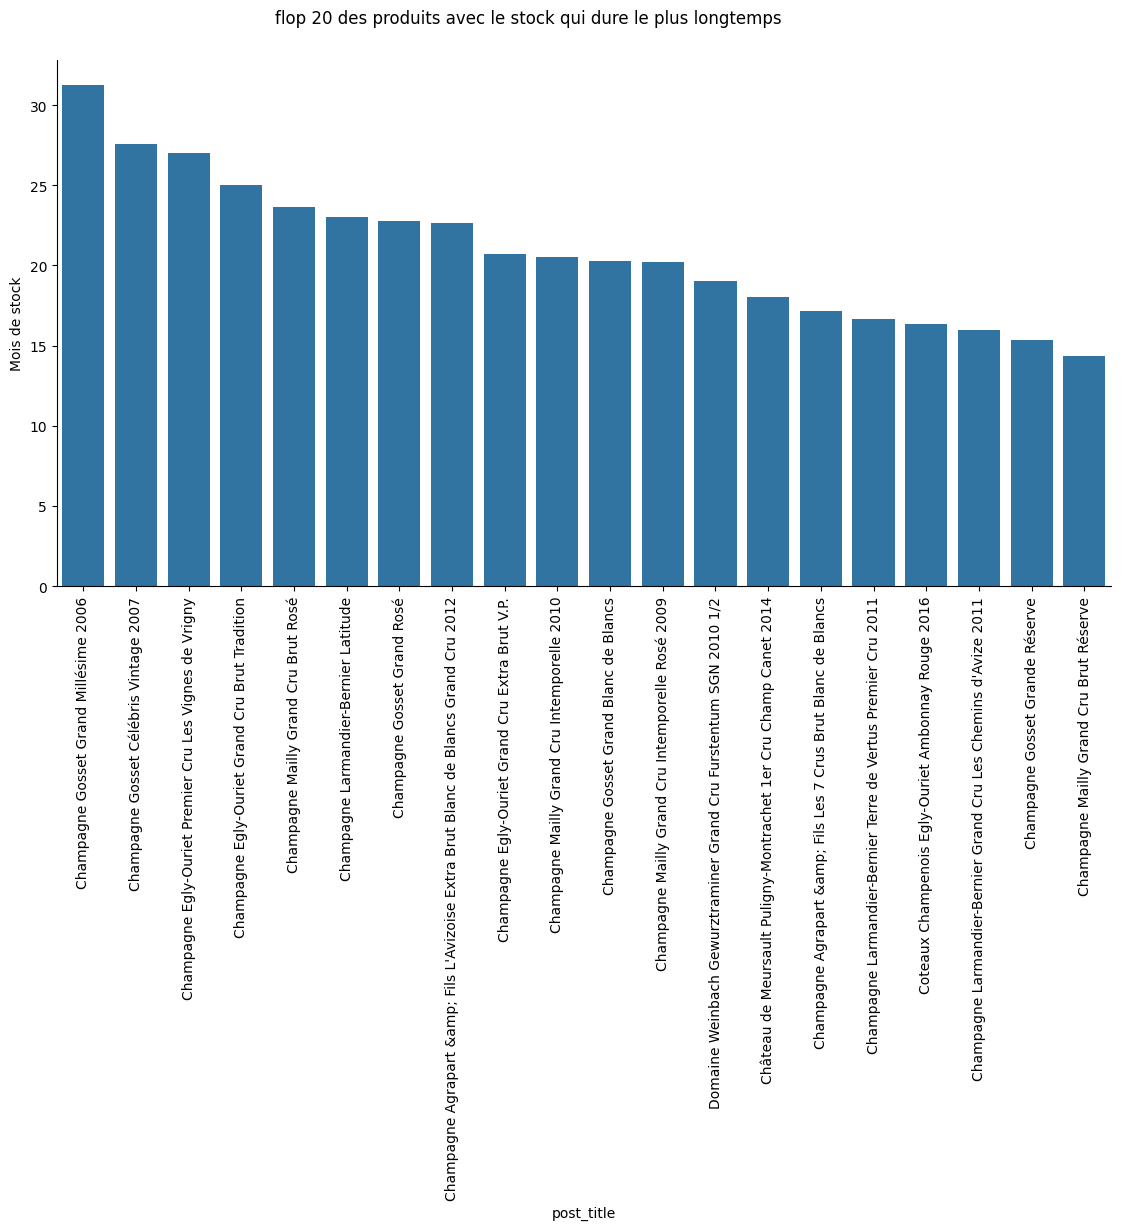

In [115]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
g =sns.catplot(data= df_data_flop_20, x= "post_title", y="Mois de stock", kind='bar', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle("flop 20 des produits avec le stock qui dure le plus longtemps", y=1.06)
plt.show()

In [116]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_data['Valorisation des stocks'] = df_data["purchase_price"] *  df_data['stock_quantity']
#Calculer la somme de la colonne "Valorisation_stock_euros"
print( "La valeur totale de tout le stock :", round(df_data['Valorisation des stocks'].sum(), 2), "€")

La valeur totale de tout le stock : 276859.09 €


In [117]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("Somme des produits en stock :", df_data['stock_quantity'].sum())

Somme des produits en stock : 16711


**La valeur du stock est estimé à 276 859.09 €, et la somme des produits en stock est de 16 711.  
Je fais un graphique pour mettre en lumière les 20 produits avec le stock qui dure le plus longtemps (en nombre de mois), c’est-à-dire ceux dont la rotation est la plus faible**


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [118]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT
df_data['Prix_HT'] = round(df_data['price'] / 1.20, 2)

#Création de la colonne Taux de marge
df_data['Taux_de_marge'] = ((df_data['Prix_HT'] - df_data['purchase_price']) / df_data['Prix_HT']) * 100

#Afficher le prix minimum de la colonne "taux_marge"
print( "Taux de marge minimum :", df_data['Taux_de_marge'].min(), "%")

Taux de marge minimum : -635.1043643263757 %


In [119]:
#Afficher le prix maximum de la colonne "taux_marge"
print( "Taux de marge maximum :", df_data['Taux_de_marge'].max(), "%")

Taux de marge maximum : 47.754838709677415 %


In [120]:
#Affichage de la ligne avec un taux de marge inférieur à 0
df_data[df_data['Taux_de_marge'] <= 0]

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,ca_par_article,part_ca,part_ca_cum_sum,part_quantite,part_quantite_cum_sum,Rotation de stock,Mois de stock,Valorisation des stocks,Prix_HT,Taux_de_marge
202,12589,4355,1,12.65,97,instock,77.48,12589,0.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7515.56,10.54,-635.104364


In [121]:
#Création d'un dataframe avec les taux positifs
df_data_taux_positif = df_data[df_data['Taux_de_marge'] >= 0]
#Afficher le prix minimum de la colonne "taux_marge"
df_data_taux_positif['Taux_de_marge'].min()

np.float64(22.802197802197803)

In [122]:
#Afficher le prix maximum de la colonne "taux_marge"
df_data_taux_positif['Taux_de_marge'].max()

np.float64(47.754838709677415)

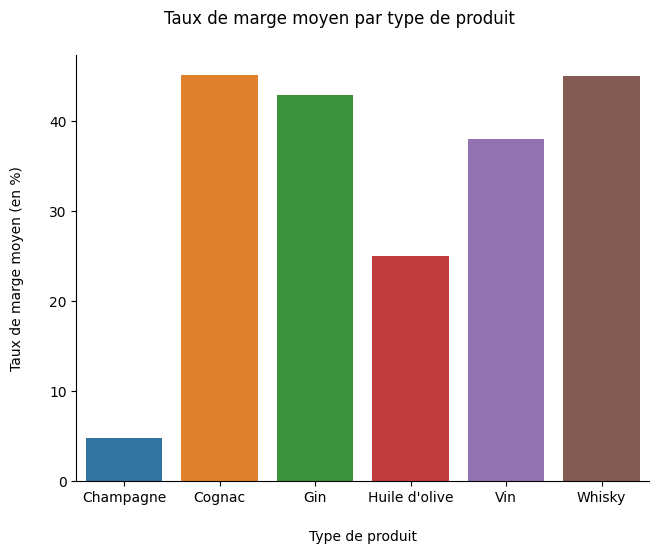

In [123]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
df_data_taux_moyen = df_data.groupby('product_type')['Taux_de_marge'].mean().reset_index()
df_data_taux_moyen.rename(columns={"Taux_de_marge" : "Taux_de_marge_moyen"}, inplace=True)
#Affichage dans un graphique du taux de marge par type de produit
g = sns.catplot(data = df_data_taux_moyen, x="product_type", y="Taux_de_marge_moyen", hue="product_type", kind="bar", aspect=1.3)
g.fig.suptitle("Taux de marge moyen par type de produit", y=1.06)
plt.xlabel("Type de produit", labelpad=18)
plt.ylabel("Taux de marge moyen (en %)", labelpad=18)
plt.show()

**Je créer en graphique du taux de marge moyen pour chaque produit.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

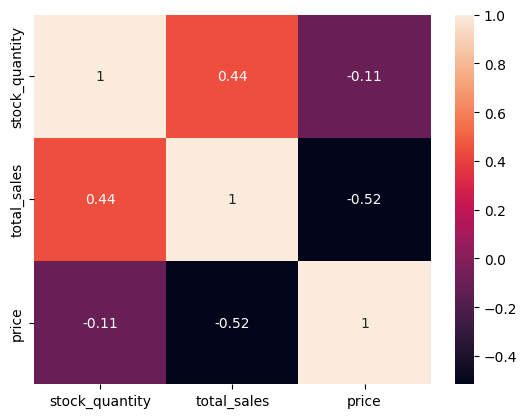

In [124]:
############################
# Analyse des corrélations #
############################

#Création d'une heatmap de corrélation avec les variables stock, sales et price
sns.heatmap(df_data[['stock_quantity', "total_sales", "price"]].corr(), annot=True)
plt.show()
#On peut également créer un mask pour n'afficher qu'une demi heatmap

**-0.52 : Corrélation modérée à forte et négative.  
  -0.11 : Corrélation très faible négative  
     0.44 : Corrélation Corrélation modérée et positive**

**Je conclue que les variables dans le dataset sont modérément liées, mais qu’il n’y a aucune corrélation très forte (proche de -1 ou 1).**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [125]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  
df_data.to_csv("C:/Users/AUCLAIR/Documents/Projet_Data_6/dataframe_projet6.csv", sep=';', encoding='utf-8-sig')

**Pour finir, j'exporte le DataFrame principal du projet en fichier CSV.**